**Imported all the necessary librairies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Read csv file

In [ ]:
df=pd.read_csv("/content/Significant_Earthquakes (1).csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Significant_Earthquakes (1).csv'

Descriptive Statistics

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

Display Rows and Columns

In [ ]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])
df.shape

*Info* about dataset

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.dtypes

droping irrrelevant column


In [ ]:
df.drop(columns=['Unnamed: 0','id','updated','status'], axis=1, inplace=True)

# **Handling Missing Values**

In [ ]:
df.isnull().sum() / len(df) * 100

 Bar Graph – Missing Values per Column

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Plot missing values as a heatmap
plt.figure(figsize=(12, 6))
missing_values = missing_values.sort_values(ascending=True)
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette="viridis", dodge=False, legend=False)
plt.xticks(rotation=90)
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Per Feature")
plt.show()

Histograms – Distribution of Numerical Columns

In [ ]:
df.hist(figsize=[20,16])
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

Check skewness

In [ ]:
# Check skewness
# If skewness is greater than ±0.5, the feature is skewed,median is a better choice

df[num_cols].skew()


Missing values were handled using the median imputation method for numerical columns and mode imputation for categorical columns

In [ ]:
#missing value handling
df["depth"]=df["depth"].fillna(df["depth"].median())
df["rms"]=df["rms"].fillna(df["rms"].mean())
df["place"]=df["place"].fillna(df["place"].mode()[0])
df["depthError"]=df["depthError"].fillna(df["depthError"].mean())
df["magNst"]=df["magNst"].fillna(df["magNst"].median())
df["gap"]=df["gap"].fillna(df["gap"].median())
df["nst"]=df["nst"].fillna(df["nst"].median())
df["dmin"]=df["dmin"].fillna(df["dmin"].median())
df["horizontalError"]=df["horizontalError"].fillna(df["horizontalError"].median())
df["magError"]=df["magError"].fillna(df["magError"].median())

In [ ]:
df.isnull().sum()

# **Outliers**


 Box Plot – Identification of Outliers in Numerical Features

NameError: name 'df' is not defined

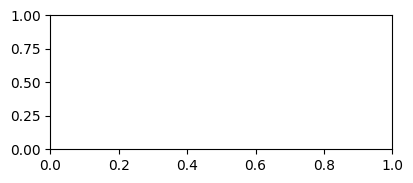

In [ ]:
# List of numerical columns to analyze
num_col = ['latitude', 'longitude', 'depth', 'mag', 'rms']


plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=df[col], color="cyan")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

We choose not to remove outliers from the dataset because, in the context of earthquakes, outliers often represent significant or extreme seismic events. These events are crucial for accurate modeling and prediction. These extreme values are not errors; they are real and meaningful data points that reflect the unpredictable nature of natural disasters.

Removing outliers could lead to a loss of important information, especially since our goal is to build a model that can handle and predict rare but impactful events like high-magnitude earthquakes.

IQR Method to Find Outliers

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Check outliers for each column
outlier_counts = {}
for col in num_cols:
    outliers = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

outlier_counts

# If outliers represent real earthquake behavior, we should keep them


# **Feature Engineering**

Extracting Year and Month From Time

In [ ]:
# making new column for month and year
#Convert to datetime
df['time'] = pd.to_datetime(df['time'])

# Extract year and month
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

Extracting Country from place

In [ ]:
# Extract the last word in the "place" column
df["country"] = df["place"].str.split(", ").str[-1]

# Display unique country values to check correctness
country_counts = df["country"].value_counts()

# Print each country and its count
for country, count in country_counts.items():
    print(f"{country}: {count}")

In [ ]:
df.columns

# **Univariate Analysis**

 Histograms –Distribution Plots of Key Features

In [ ]:
num_col=['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap', 'dmin', 'rms', 'horizontalError','year','magNst','magError']

# Adjust the figsize to accommodate all columns
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  # 3 rows, 4 columns

for i, column in enumerate(num_col):
    row, col = divmod(i, 4)  # Calculate row and column index
    sns.histplot(data=df, x=column, kde=True, ax=axes[row, col], color='magenta')  # Access axes using row, col
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

Countplot  – Distribution of  Magnitude Types

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(df, x="magType", hue="magType", stat="percent")
plt.ylabel('Percentage')
plt.title('Distribution Magnitude Type')
plt.show()

Pie Chart – Earthquakes by Top 10 Countries

In [ ]:
# Select the top 10 countries
top_countries = country_counts.head(10)

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proportion of Earthquakes in the Top 10 Countries")
plt.show()

Violin Plot - Earthquake Magnitude Distribution per Country

In [ ]:
# Select top 10 countries with most earthquakes
top_countries = df['country'].value_counts().nlargest(10).index
df_top = df[df['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.violinplot(x='country', y='mag', data=df_top, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Magnitude")
plt.title("Magnitude Distribution per Country")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **Bivariate Analysis**

 Scatter Plot – Earthquake Magnitude  vs  Depth

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["depth"], y=df["mag"], alpha=0.5)

plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Magnitude vs. Depth of Earthquakes")
plt.grid(True)
plt.show()

The majority of earthquakes occur at depths less than 100 km (left side of the graph).

This suggests that shallow earthquakes are more frequent than deeper ones.

Magnitudes (5.0 to 9.0) appear randomly distributed across different depths.

This means that depth does not strongly influence the magnitude of an earthquake.

Both shallow and deep earthquakes can have high or low magnitudes.

 Line Plot – Earthquake Magnitude Trend Over Years

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='mag', data=df)
plt.title('Magnitude Over Year')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.show()

 Line Plot – Yearly Trend of Major Earthquakes (Magnitude > 7)

In [ ]:
# Filter earthquakes with magnitude greater than 7
df_filtered = df[df['mag'] > 7]

# Count earthquakes per year
yearly_counts = df_filtered.groupby('year')['mag'].count()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='red')
# Labels and title
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes (Magnitude > 7)")
plt.title("Yearly Trend of Major Earthquakes (Magnitude > 7)")
plt.grid(True)
plt.show()

# **Multivariate Analysis**

 Animated World Map – Visualization of Earthquake Events

In [ ]:
import plotly.express as px
fig = px.scatter_geo(df, lon='longitude', lat='latitude',size='mag', animation_frame='year', projection='natural earth',title='Earthquake Animation')

fig.update_geos(
  showcoastlines=True, coastlinecolor="Red",
showland=True, landcolor="rgb(200, 200, 200)",
showocean=True, oceancolor="rgb(100, 149, 237)",
showcountries=True, countrycolor="rgb(35, 35, 35)"
)

fig.update_layout(
    height=1000,
    width= 1000
)

fig.show()

 World Map – Global Distribution of Major Earthquakes (1900 to Present)

In [ ]:
!pip install cartopy

In [ ]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature



# Create a figure and add a map projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={"projection": ccrs.PlateCarree()})

# Add features: land, borders, and coastlines
ax.add_feature(cfeature.LAND, color="lightgreen")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.COASTLINE)

# Scatter plot of earthquake locations
sc = ax.scatter(df['longitude'], df['latitude'],
                c=df['mag'], cmap='Blues', alpha=0.6, edgecolors="black",
                transform=ccrs.PlateCarree())

# Add title
ax.set_title("Major Earthquakes 1900-2025")

# Show the plot
plt.show()


 World Map – Earthquake Locations and Magnitude Representation

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

# Define plot size
plt.figure(figsize=(15, 8))

# Plot the scatter map using existing longitude and latitude
scatter = plt.scatter(
    df['longitude'],
    df['latitude'],
    c=df['mag'],
    cmap='coolwarm',
    s=(10 / (df['depth'] + 1)) * 50,
    alpha=0.7,
    edgecolors='k'
)

# Add colorbar and labels
cbar = plt.colorbar(scatter)
cbar.set_label("Earthquake Magnitude", fontsize=12)

plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.title("Global Earthquake Distribution by Magnitude", fontsize=14, fontweight="bold")

plt.show()


In [ ]:
df.columns

Droping Columns which not taking for features

In [ ]:
df.drop(columns=['time','magSource','locationSource','depthError','net','place','type'], axis=1, inplace=True)

# **Label Encoding**

In [ ]:
le = LabelEncoder()
df['magType'] = le.fit_transform(df['magType'])
df['country'] = le.fit_transform(df['country'])
print(df)

**features and target Selection**

In [ ]:
# Select relevant columns
features = ['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap','magError','dmin', 'rms', 'horizontalError', 'magNst', 'year']
target = 'mag'

In [ ]:
# Features and target
X = df[features]
y = df[target]

Heatmap – Correlation Among Earthquake Features

In [ ]:
# Calculate the correlation matrix only for numerical features
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# **Standard Scaling**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Model Selection**

# **Linear Regression**

In [ ]:

from sklearn.linear_model import LinearRegression
lr= LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)


In [ ]:
print("r2 of linear regression",r2_lr)
print("mse of linear regression",mse_lr)
print("rmse of linear regression",rmse_lr)


# **SVM**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred_svm = svr.predict(X_test)

r2_svm = r2_score(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

print("r2 of linear regression",r2_svm)
print("mse of linear regression",mse_svm)
print("rmse of linear regression",rmse_svm)


# **Desicion Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Train the model
dt= DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluation
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)



In [ ]:
print("r2 of Decison Tree",r2_dt)
print("mse of Decision Tree",mse_dt)
print("rmse of Decision Tree",rmse_dt)


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf= RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf= rf.predict(X_test)

# Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("r2 of Decison Tree",r2_rf)
print("mse of Decision Tree",mse_rf)
print("rmse of Decision Tree",rmse_rf)

# **Hyper Tunning Random Forest**

In [ ]:
# Select relevant columns
X = df[['latitude', 'longitude', 'depth', 'magType', 'nst', 'gap',
        'dmin', 'rms', 'horizontalError','year','magNst','magError']]
y = df['mag']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_ht=RandomForestRegressor(
    n_estimators=1500,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_ht.fit(X_train,y_train)

In [ ]:
y_pred_rfht = rf_ht.predict(X_test)

# Evaluation
r2_rfht = r2_score(y_test, y_pred_rfht)
mse_rfht = mean_squared_error(y_test, y_pred_rfht)
rmse_rfht = np.sqrt(mse_rfht)

print("r2 of Decison Tree",r2_rfht)
print("mse of Decision Tree",mse_rfht)
print("rmse of Decision Tree",rmse_rfht)

Regression Model results

In [ ]:
regression_results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM',"Random Forest Hyper Tuned" ],
    'R2 Score': [r2_lr, r2_dt, r2_rf, r2_svm, r2_rfht],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_svm, mse_rfht],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_svm, rmse_rfht]
})

print(regression_results)


Based on these results, the Random Forest models, especially the hyperparameter-tuned version, appear to be the most suitable for predicting the target variable in your dataset

In [ ]:
import pickle

# Save trained RandomForestRegressor model
with open('earthquake_model.pkl', 'wb') as f:
    pickle.dump(rf_ht, f)
# Comprsesing the model
import joblib
joblib.dump(rf_ht, 'earthquake_model.pkl', compress=3)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder
with open('magType_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)